In [1]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import numpy as np
import pandas as pd
from PIL import Image
from scipy.optimize import curve_fit
from scipy.interpolate import make_interp_spline

import sys
sys.path.append('../_styling/')
from style import prep_plot, BLACK, GRAY2

original data available here
https://www.netscribes.com/chatgpt-4-a-near-to-perfect-ai-powered-digital-assistant/

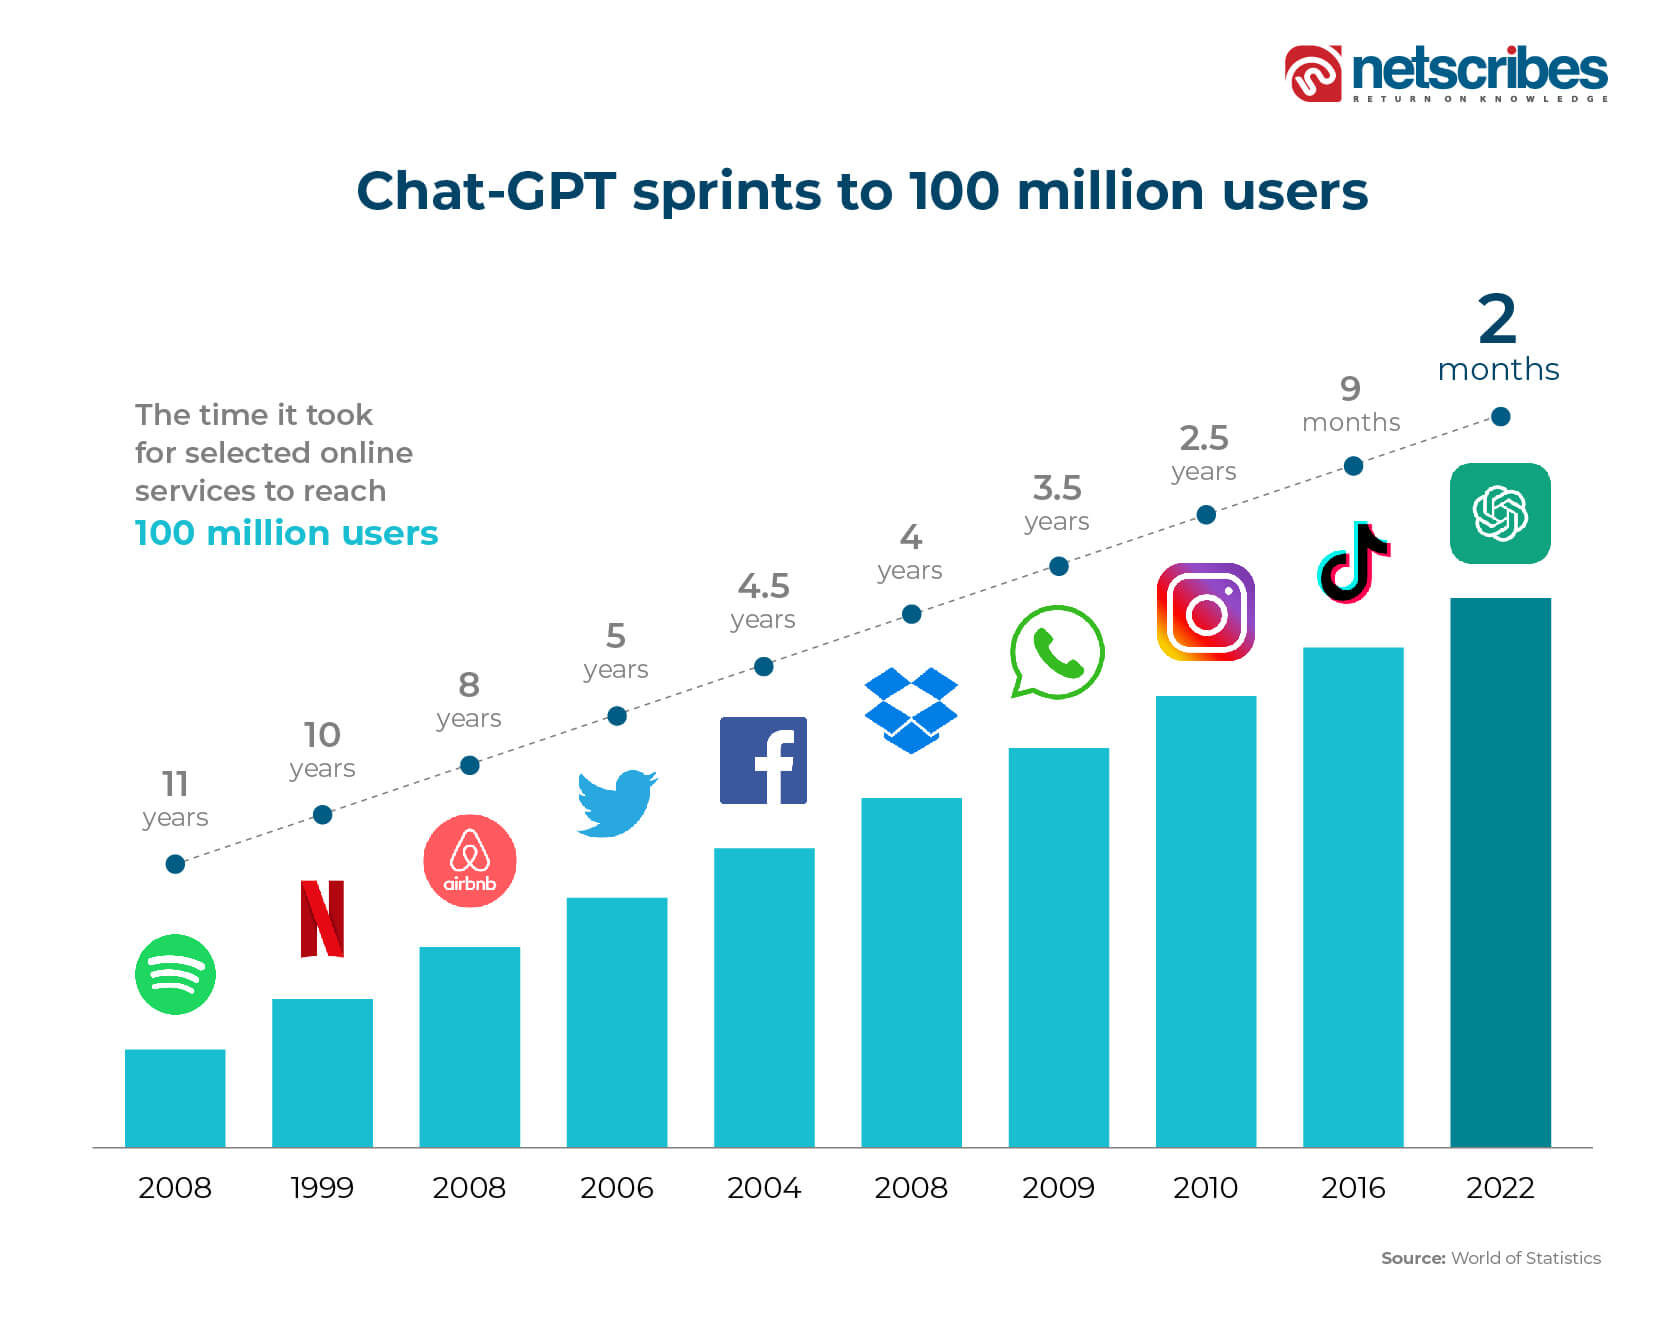

In [2]:
df = pd.DataFrame(
    {
        # less viral
        "Spotify": [2008,11],
        "Airbnb": [2008,8],   
        # most viral
        "Netflix": [1999,10],
        "Twitter": [2006,5],
        "Facebook": [2004,4.5],
        "Dropbox": [2008,4],
        "WhatsApp": [2009,3.5],
        "Instagram": [2010,2.5],
        "Tiktok": [2016,9/12],
        "ChatGPT": [2022,1/12]
    },    
    index=['Year', 'Years to 100M Users']
).T
df

,Year,Years to 100M Users
Spotify,2008.0,11.000000
Airbnb,2008.0,8.000000
Netflix,1999.0,10.000000
Twitter,2006.0,5.000000
Facebook,2004.0,4.500000
Dropbox,2008.0,4.000000
WhatsApp,2009.0,3.500000
Instagram,2010.0,2.500000
Tiktok,2016.0,0.750000
ChatGPT,2022.0,0.083333


In [3]:
X = 'Year'
Y = 'Years to 100M Users'

MIN_Y = 1998

def exponential_decay(x, a, b):
    return a * np.exp(-b * (x - MIN_Y))

train_xs = df[X].to_numpy()[2:]
train_ys = df[Y].to_numpy()[2:]
initial_guess = (1, 0.1)
popt, pcov = curve_fit(exponential_decay, train_xs, train_ys, p0=initial_guess)
fit_xs = np.linspace(MIN_Y, 2023)
fit_ys = exponential_decay(fit_xs, *popt)
spl = make_interp_spline(fit_xs, fit_ys, k=1)
smooth_ys = spl(fit_xs)

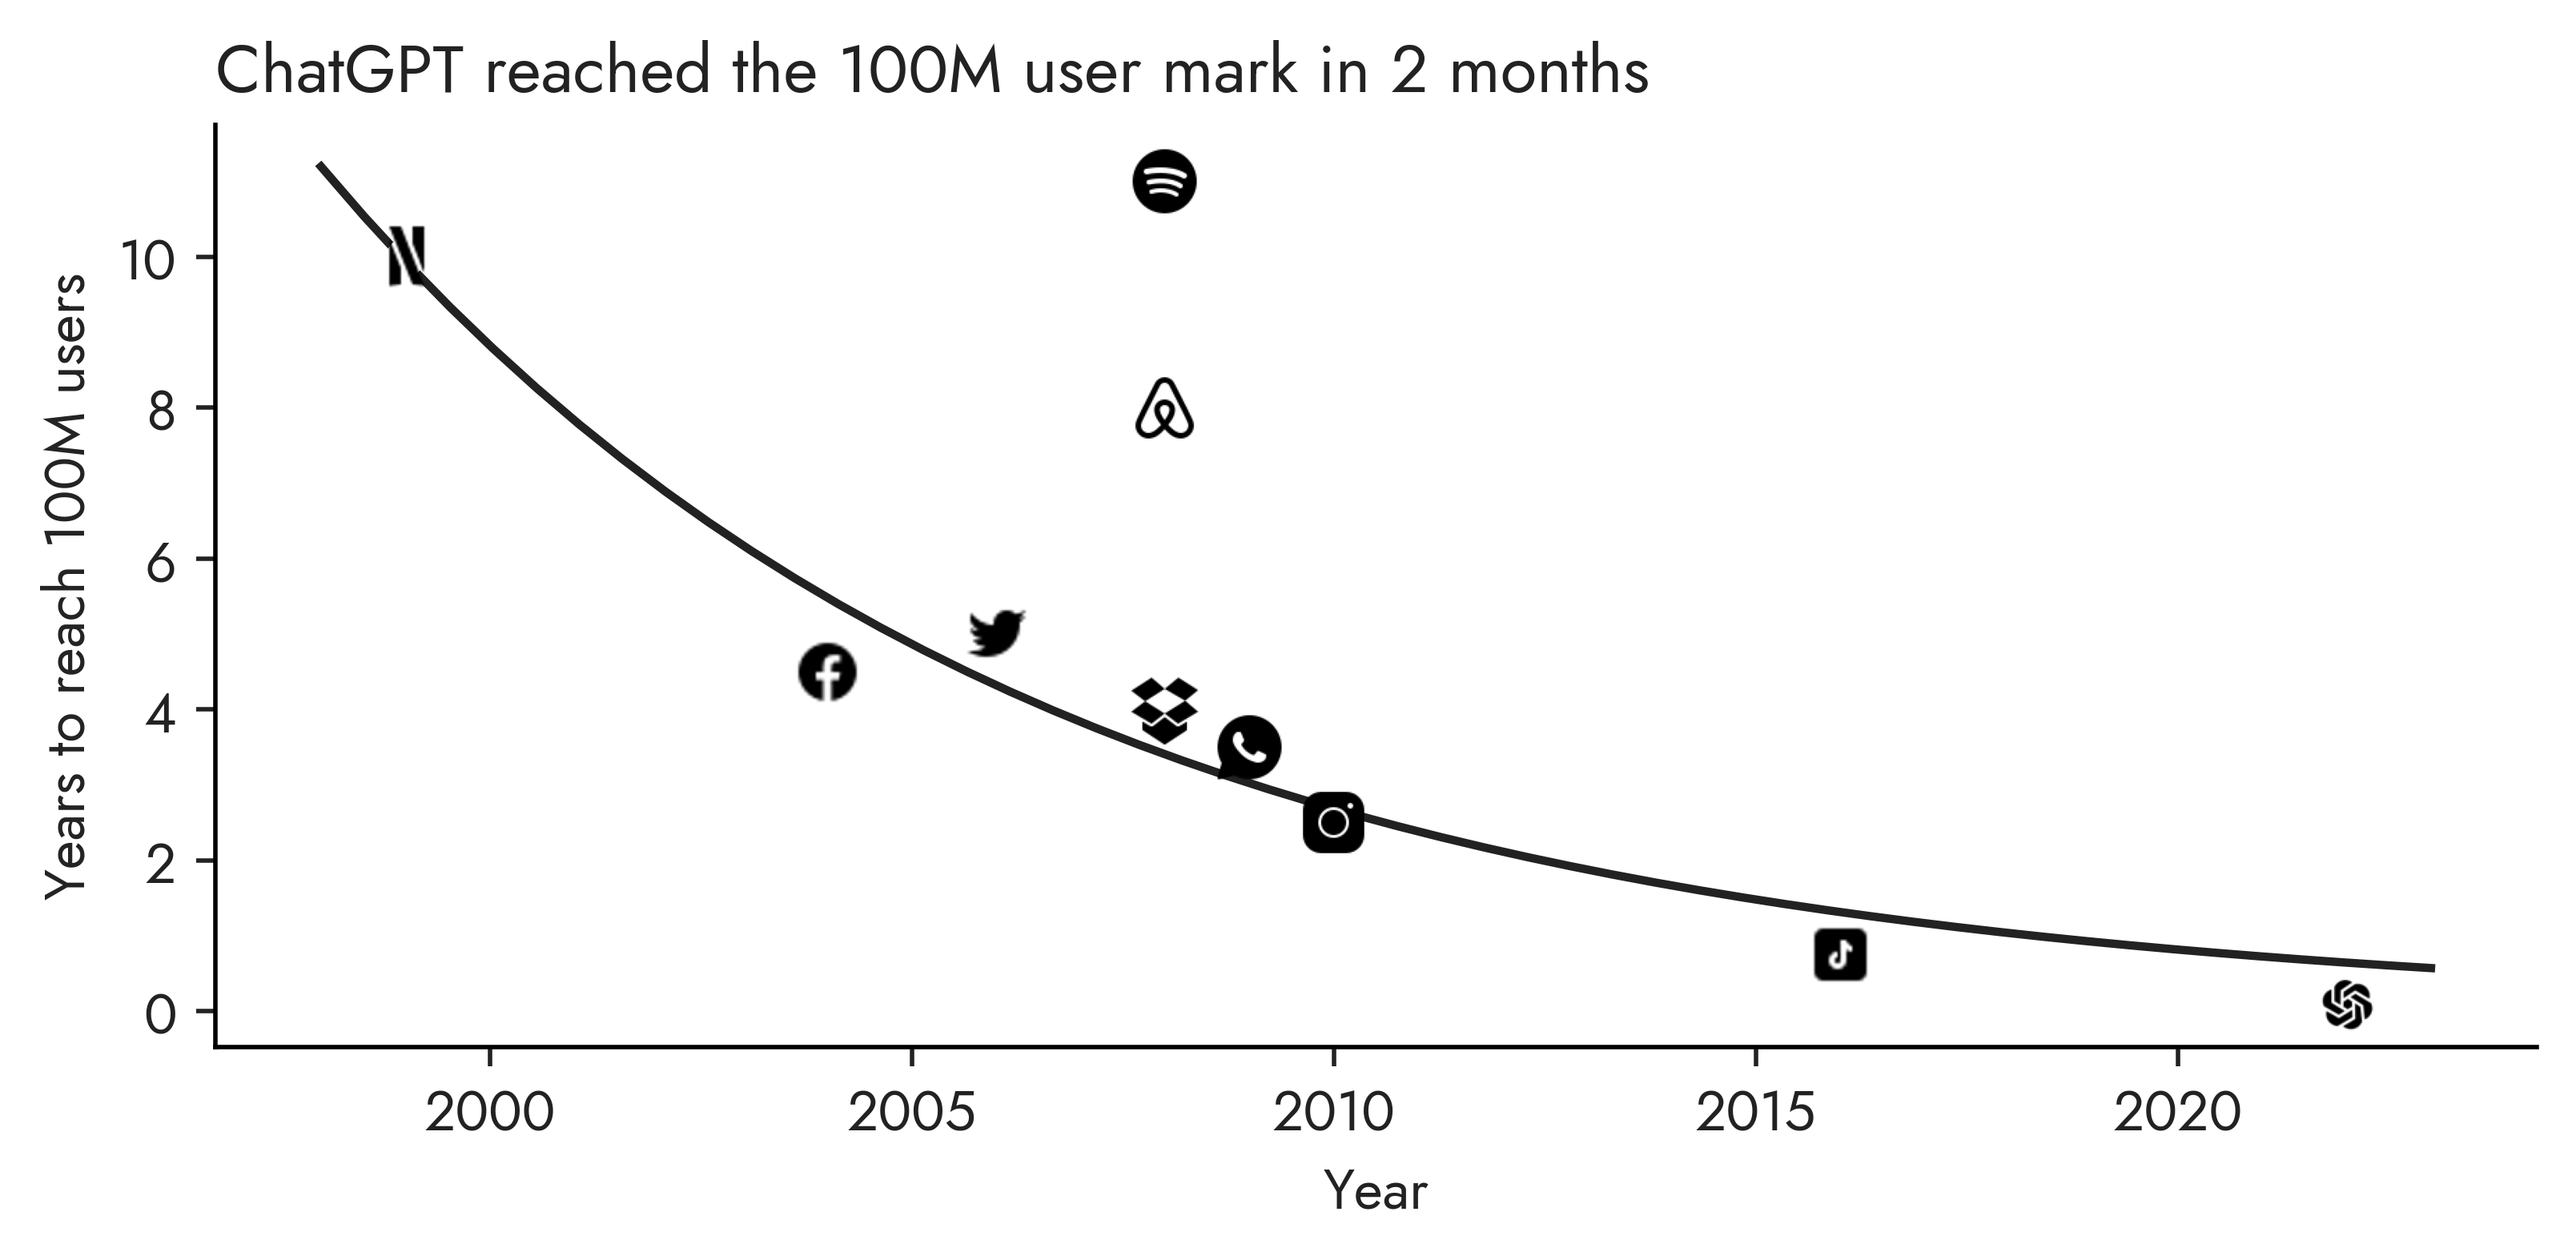

In [4]:
plt = prep_plot()

plt.plot(fit_xs, smooth_ys, BLACK, zorder=1)
plt.scatter(x=df[X], y=df[Y], color='white', zorder=2)

for app, row in df.iterrows():
    path = f"logos/icons8-{app.lower()}.png"
    img = Image.open(path)
    img = img.resize((50, 50))
    img = OffsetImage(img, alpha=1, zoom=.25)
    ab = AnnotationBbox(img, (row[X], row[Y]), frameon=False)
    plt.gca().add_artist(AnnotationBbox(img, (row[X], row[Y]), frameon=False))


plt.xlabel('Year')
plt.ylabel('Years to reach 100M users')    
plt.title('ChatGPT reached the 100M user mark in 2 months', loc='left')
plt.savefig("chatgpt_adoption.png")